The scikit learn version is 0.22.1.
(900, 9) (900,)
(675, 9) (675,)
0
1
clf.coef is:[[ 1.63503963  2.301496   -0.31093921 -0.37634299  0.31388123  1.10383171
   0.30506211  0.32272215  0.34344743]]
clf.intercept is:[-0.09860143]
[ True]
[5.61087751]
0.5955555555555555
0.6
              precision    recall  f1-score   support

        True       0.72      0.56      0.63       136
       False       0.50      0.66      0.57        89

    accuracy                           0.60       225
   macro avg       0.61      0.61      0.60       225
weighted avg       0.63      0.60      0.60       225

[[76 60]
 [30 59]]
[ True]
[1.39020634]
0.6281481481481481
0.6844444444444444
              precision    recall  f1-score   support

        TRUE       0.73      0.75      0.74       136
       FALSE       0.60      0.58      0.59        89

    accuracy                           0.68       225
   macro avg       0.67      0.67      0.67       225
weighted avg       0.68      0.68      0.68       

D:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


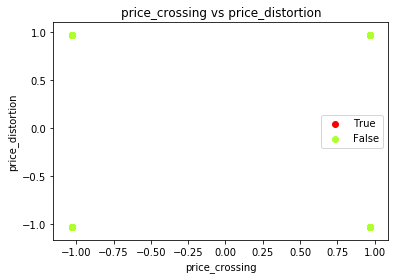

In [1]:
#Our first machine learning model
#uses Treasury Squeeze and SGD classifier \LogisticRegression
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

import pandas as pd
import numpy as np
path= 'C:\\Users\Administrator\\Desktop\\IE517_machine learning\\'
data=pd.read_csv(path+ 'Treasury Squeeze test - DS1.csv',index_col='rowindex')
data.head()


from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
y=np.array(data['squeeze'])
X=data.iloc[:,list(range(1,10))]
print( X.shape, y.shape)
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

import matplotlib.pyplot as plt
squeeze = ['True', 'False']
colors=['red', 'greenyellow']
for i in range(len(squeeze)):
    print(i)
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(squeeze)
plt.title('price_crossing vs price_distortion')
plt.xlabel('price_crossing')
plt.ylabel('price_distortion')

###SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
clf = SGDClassifier()
clf.fit(X_train, y_train)
print('clf.coef is:'+ str(clf.coef_))
print( 'clf.intercept is:'+ str(clf.intercept_))

print( clf.predict([[1,1,1,0,1,1,0,1,1]]) )
print( clf.decision_function([[1,1,1,0,1,1,0,1,1]] ))

from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )


y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred, target_names=['True','False']) )
print( metrics.confusion_matrix(y_test, y_pred) )


###LogisticRegression
clf2 = LogisticRegression(penalty='l2')
clf2.fit(X_train, y_train)


print( clf2.predict([[1,1,1,0,1,1,0,1,1]]) )
print( clf2.decision_function([[1,1,1,0,1,1,0,1,1]] ))

from sklearn import metrics
y_train_pred = clf2.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )


y_pred = clf2.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred, target_names=['TRUE','FALSE']) )

accuracy = metrics.accuracy_score(y_test, y_pred)
print ('accuracy: %.2f%%' % (100 * accuracy))


from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
# create a composite estimator made by a pipeline of the standarization and the linear model
clf3 = Pipeline([(
        'scaler', StandardScaler()),
        ('LR_model', LogisticRegression())
])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold( 5, shuffle=False, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf3, X, y, cv=cv)
print( scores )

from scipy.stats import sem
def mean_score(scores): return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print( mean_score(scores) )


print("My name is Zhiyi Ye")
print("My NetID is: zhiyiye2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
######STOP HERE######################

In [25]:
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

import pandas as pd
import numpy as np
path= 'C:\\Users\Administrator\\Desktop\\IE517_machine learning\\'
data=pd.read_csv(path+ 'Treasury Squeeze test - DS1.csv',index_col='rowindex')
data.head()

The scikit learn version is 0.22.1.


,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
rowindex,,,,,,,,,,,
1,TUZ92 Comdty,0,1,0,1,1,1,1,0,0,True
2,TUH93 Comdty,0,1,1,0,1,1,0,0,1,False
3,TUM93 Comdty,0,0,1,1,0,0,0,0,0,False
4,TUU93 Comdty,1,1,0,0,0,0,0,1,1,True
5,TUZ93 Comdty,0,0,1,1,1,1,1,0,0,False


In [32]:
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
y=np.array(data['squeeze'])
X=data.iloc[:,list(range(1,10))]
print( X.shape, y.shape)
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(900, 9) (900,)
(675, 9) (675,)


0
1


Text(0, 0.5, 'price_distortion')

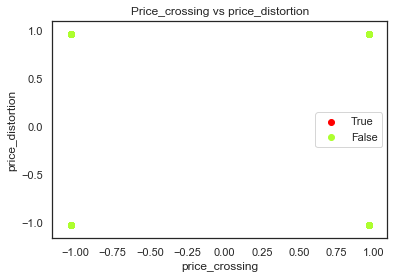

In [31]:
import matplotlib.pyplot as plt
squeeze = ['True', 'False']
colors=['red', 'greenyellow']
for i in range(len(squeeze)):
    print(i)
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(squeeze)
plt.title('Price_crossing vs price_distortion')
plt.xlabel('price_crossing')
plt.ylabel('price_distortion')

In [28]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )


y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred, target_names=['True','False']) )
print( metrics.confusion_matrix(y_test, y_pred) )

0.5777777777777777
0.6177777777777778
              precision    recall  f1-score   support

        True       0.67      0.72      0.70       136
       False       0.52      0.46      0.49        89

    accuracy                           0.62       225
   macro avg       0.60      0.59      0.59       225
weighted avg       0.61      0.62      0.61       225

[[98 38]
 [48 41]]


In [29]:
###LogisticRegression
clf2 = LogisticRegression(penalty='l2')
clf2.fit(X_train, y_train)


print( clf2.predict([[1,1,1,0,1,1,0,1,1]]) )
print( clf2.decision_function([[1,1,1,0,1,1,0,1,1]] ))

from sklearn import metrics
y_train_pred = clf2.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )


y_pred = clf2.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred, target_names=['TRUE','FALSE']) )

accuracy = metrics.accuracy_score(y_test, y_pred)
print ('accuracy: %.2f%%' % (100 * accuracy))


[ True]
[1.39020634]
0.6281481481481481
0.6844444444444444
              precision    recall  f1-score   support

        TRUE       0.73      0.75      0.74       136
       FALSE       0.60      0.58      0.59        89

    accuracy                           0.68       225
   macro avg       0.67      0.67      0.67       225
weighted avg       0.68      0.68      0.68       225

accuracy: 68.44%


In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
# create a composite estimator made by a pipeline of the standarization and the linear model
clf3 = Pipeline([(
        'scaler', StandardScaler()),
        ('LR_model', LogisticRegression())
])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold( 5, shuffle=False, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf3, X, y, cv=cv)
print( scores )

from scipy.stats import sem
def mean_score(scores): return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print( mean_score(scores) )


print("My name is Zhiyi Ye")
print("My NetID is: zhiyiye2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
######STOP HERE######################

[0.63888889 0.58888889 0.65555556 0.71666667 0.57777778]
Mean score: 0.636 (+/- 0.025)
My name is Zhiyi Ye
My NetID is: zhiyiye2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


D:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
